In [1]:
import numpy as np
import cv2 as cv
import sys
sys.path.append("../")
from matplotlib import pyplot as plt
from apt.quadtree import FixedQuadTree

In [2]:
res = 8192
gau = 9
t_l = 60
t_h = 100
lenth = 4096

In [3]:
img = cv.imread(f'/Users/zezzz/Desktop/zez/samples/s8d/selected/gd.png') 

img = cv.resize(img, (res,res))
print(img.shape)
grey_img = cv.GaussianBlur(img, (gau,gau), 0)
print(grey_img.shape)
edges = cv.Canny(grey_img, t_l, t_h)
print(edges.shape)

(8192, 8192, 3)
(8192, 8192, 3)
(8192, 8192)


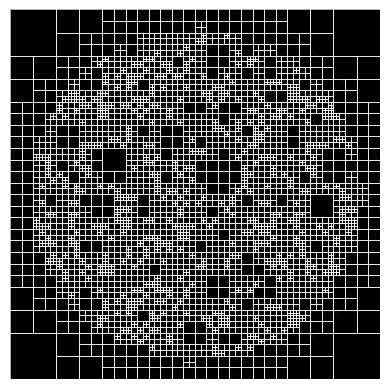

4096


In [4]:
fig, ax = plt.subplots()
ax.imshow(edges, cmap = 'gray')
qdt = FixedQuadTree(domain=edges, fixed_length=lenth)
qdt.draw(ax=ax)
ax.axis('off')
pdf_path = f"./ap_{lenth}.pdf"
plt.savefig(pdf_path, transparent=True, bbox_inches='tight')
plt.show()
print(qdt.count_patches())
plt.close()

(4096, 8, 8, 3)
(4096, 8, 8, 3)
demask: (8192, 8192, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


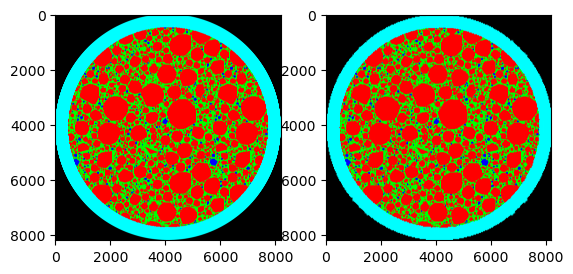

In [5]:
def patchify(mask, patch_size=8, channel=3):
    seq = qdt.serialize(mask, size=(patch_size, patch_size, channel))
    return seq

def depatchify(seq, patch_size=8, channel=3):
    # mask = np.zeros(shape=(512, 512, 3))
    mask = qdt.deserialize(seq, patch_size=patch_size, channel=channel)
    return mask

mask = cv.imread(f'/Users/zezzz/Desktop/zez/samples/s8d/selected/gd.png') 


seq,_,_ = patchify(mask=mask, patch_size=8, channel=3)
print(np.asarray(seq).shape)

plt.subplot(121)
plt.imshow(mask)

seq,_,_ = patchify(mask=mask, patch_size=8, channel=3)
print(np.asarray(seq).shape)

plt.subplot(121)
plt.imshow(mask)


remask= depatchify(seq=seq, patch_size=8, channel=3)
remask = remask.astype(int)
plt.subplot(122)
plt.imshow(remask)
ax.imshow(remask, cmap = 'gray')
plt.show()
plt.close()


Image shape: (8192, 8192, 3)
Image dtype: int64


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


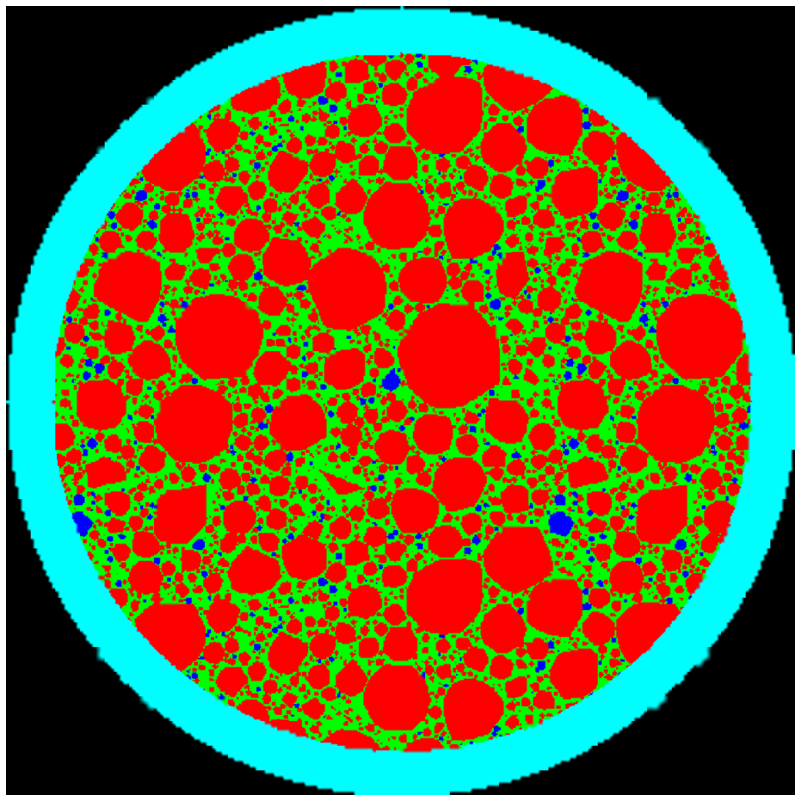

In [6]:
# remask = cv.cvtColor(remask, cv.COLOR_BGR2RGB)

# Check image properties
print(f"Image shape: {remask.shape}")
print(f"Image dtype: {remask.dtype}")

# Display image
fig, ax = plt.subplots(figsize=(16, 16), dpi=64)
plt.imshow(remask)
ax.axis("off")
plt.show()
plt.close()

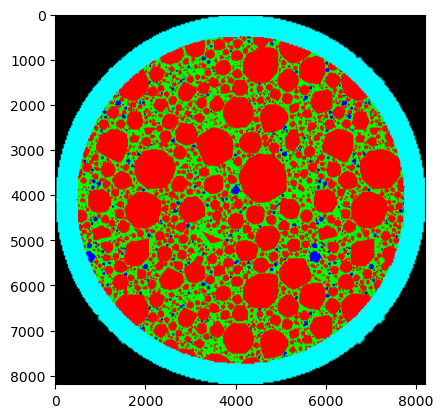

In [7]:
# Assuming 'img' is your (8192, 8192, 3) int64 array
remask = np.clip(remask, 0, 255).astype(np.uint8)  # Clip and convert to uint8

plt.imshow(remask)
ax.axis("off")
plt.show()
plt.close()

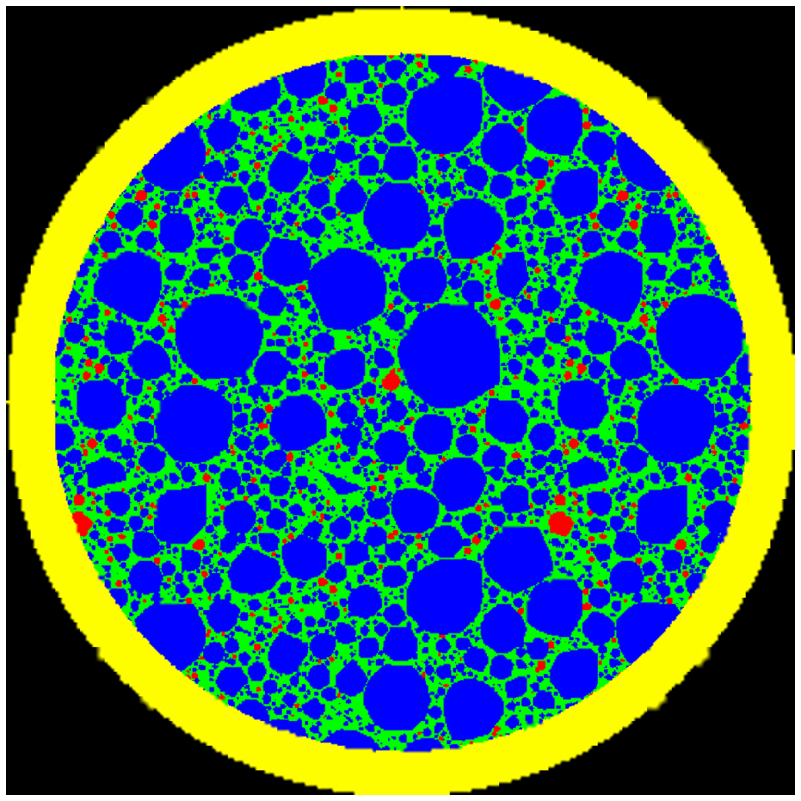

In [12]:
remask = cv.cvtColor(remask, cv.COLOR_RGB2BGR)
# Display
fig, ax = plt.subplots(figsize=(16, 16), dpi=64)
plt.imshow(remask)
pdf_path = f"./qdt_mask_{lenth}.pdf"
ax.axis("off")
plt.savefig(pdf_path, transparent=True, bbox_inches='tight')
plt.show()
plt.close()